In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Gradient Descent Predicted price for 2500 sq ft: $429673.85


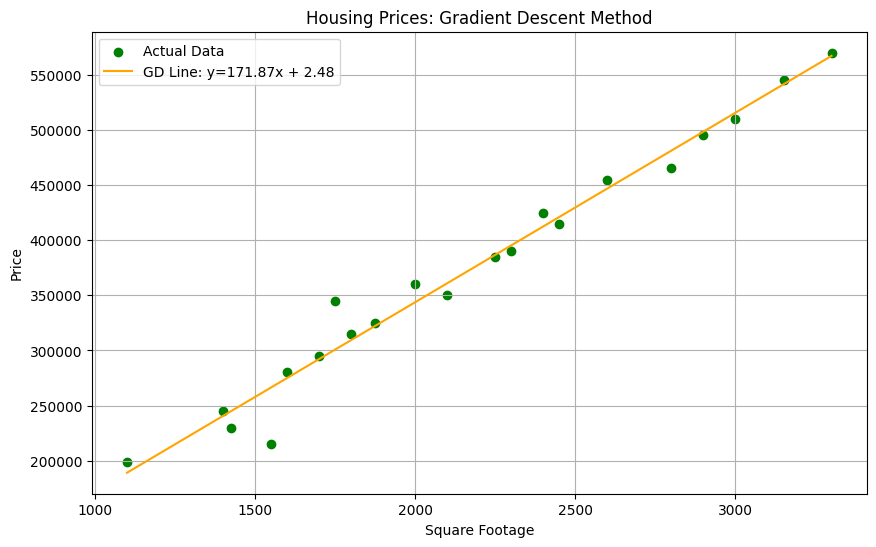

In [7]:
# Load dataset
data = pd.read_csv('/content/housing_prices - housing_prices.csv')
sqft = data.iloc[:, 0].values
price = data.iloc[:, 1].values

def gradient_descent(features, targets, lr, steps):

    slope = 0.0
    intercept = 0.0
    n_samples = len(targets)

    for _ in range(steps):
        predictions = slope * features + intercept

        # Compute gradients
        grad_slope = (-2 / n_samples) * np.sum(features * (targets - predictions))
        grad_intercept = (-2 / n_samples) * np.sum(targets - predictions)

        # Update parameters
        slope -= lr * grad_slope
        intercept -= lr * grad_intercept

    return intercept, slope


# Hyperparameters
lr = 1e-7
steps = 100000

# Train model
intercept, slope = gradient_descent(sqft, price, lr, steps)

# Prediction
target_sqft = 2500
estimated_price = slope * target_sqft + intercept
print(f"Gradient Descent Predicted price for {target_sqft} sq ft: ${estimated_price:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(sqft, price, color='green', label='Actual Data')

x_vals = np.linspace(sqft.min(), sqft.max(), 100)
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='orange', label=f'GD Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Housing Prices: Gradient Descent Method')
plt.legend()
plt.grid(True)
plt.show()